# CLassical RBM training on the Bars-And-Stripes Dataset for Reconstruction
This is an example on classical Gibbs training of an RBM on the BAS(4,4)
dataset.
Developed by: Jose Pinilla

In [1]:
# Required packages
import qaml
import torch

import matplotlib.pyplot as plt
import torchvision.transforms as torch_transforms


In [2]:
################################# Hyperparameters ##############################
M,N = SHAPE = (4,4)
DATA_SIZE = N*M
HIDDEN_SIZE = 16
EPOCHS = 2000
SAMPLES = 1000
BATCH_SIZE = 500
# Stochastic Gradient Descent
learning_rate = 0.1
weight_decay = 1e-4
momentum = 0.5


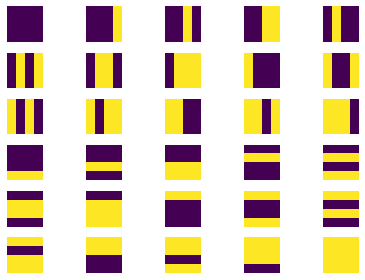

In [3]:
#################################### Input Data ################################
train_dataset = qaml.datasets.BAS(*SHAPE,transform=torch_transforms.ToTensor())
train_sampler = torch.utils.data.RandomSampler(train_dataset,replacement=True,
                                               num_samples=SAMPLES)
# Or just shuffle without new samples:
# train_sampler = torch.utils.data.RandomSampler(train_dataset,replacement=False)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           sampler=train_sampler,
                                           batch_size=BATCH_SIZE)

# PLot all data
fig,axs = plt.subplots(6,5)
for ax,(img,label) in zip(axs.flat,train_dataset):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()


In [4]:
################################# Model Definition #############################
# Specify model with dimensions
rbm = qaml.nn.RBM(DATA_SIZE, HIDDEN_SIZE)

# Set up optimizer
optimizer = torch.optim.SGD(rbm.parameters(), lr=learning_rate,
                            weight_decay=weight_decay,
                            momentum=momentum)

# Set up training mechanisms
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
CD = qaml.autograd.SampleBasedConstrastiveDivergence() # L1 loss
# CD = qaml.autograd.ConstrastiveDivergence() # MSE loss


In [5]:
################################## Model Training ##############################
# Set the model to training mode
rbm.train()
err_log = []
b_log = [rbm.b.detach().clone().numpy()]
c_log = [rbm.c.detach().clone().numpy()]
W_log = [rbm.W.detach().clone().numpy().flatten()]
for t in range(EPOCHS):
    epoch_error = torch.Tensor([0.])
    for img_batch, labels_batch in train_loader:
        input_data = img_batch.flatten(1)

        # Positive Phase
        v0, prob_h0 = input_data, rbm(input_data)
        # Negative Phase
        vk, prob_hk = gibbs_sampler(v0.detach(), k=5)
        # Or sample from random init
        # vk, prob_hk = gibbs_sampler(0.1*torch.randn((500,rbm.V)), k=5)

        # Reconstruction error from Contrastive Divergence
        err = CD.apply((v0,prob_h0), (vk,prob_hk), *rbm.parameters())

        # Do not accumulated gradients
        optimizer.zero_grad()
        # Compute gradients. Save compute graph at last epoch
        err.backward()

        # Update parameters
        optimizer.step()

        #Accumulate error for this epoch
        epoch_error  += err

    # Error Log
    b_log.append(rbm.b.detach().clone().numpy())
    c_log.append(rbm.c.detach().clone().numpy())
    W_log.append(rbm.W.detach().clone().numpy().flatten())
    err_log.append(epoch_error.item())
    print(f"Epoch {t} Reconstruction Error = {epoch_error.item()}")
# Set the model to evaluation mode
# rbm.eval()


Epoch 0 Reconstruction Error = 3.807074546813965
Epoch 1 Reconstruction Error = 2.253579616546631
Epoch 2 Reconstruction Error = 1.1616336107254028
Epoch 3 Reconstruction Error = 0.5020027756690979
Epoch 4 Reconstruction Error = 0.46893760561943054
Epoch 5 Reconstruction Error = 0.5552929043769836
Epoch 6 Reconstruction Error = 0.779760479927063
Epoch 7 Reconstruction Error = 0.5409607887268066
Epoch 8 Reconstruction Error = 0.7758681178092957
Epoch 9 Reconstruction Error = 0.8016753196716309
Epoch 10 Reconstruction Error = 0.7634325623512268
Epoch 11 Reconstruction Error = 0.6743708848953247
Epoch 12 Reconstruction Error = 1.1430904865264893
Epoch 13 Reconstruction Error = 0.836012601852417
Epoch 14 Reconstruction Error = 0.807799220085144
Epoch 15 Reconstruction Error = 0.769775390625
Epoch 16 Reconstruction Error = 0.579156756401062
Epoch 17 Reconstruction Error = 1.0911474227905273
Epoch 18 Reconstruction Error = 0.7359765768051147
Epoch 19 Reconstruction Error = 0.9265828132629395

Epoch 160 Reconstruction Error = 0.42400607466697693
Epoch 161 Reconstruction Error = 0.48962023854255676
Epoch 162 Reconstruction Error = 0.291616827249527
Epoch 163 Reconstruction Error = 0.3620612323284149
Epoch 164 Reconstruction Error = 0.36284661293029785
Epoch 165 Reconstruction Error = 0.45549705624580383
Epoch 166 Reconstruction Error = 0.45027682185173035
Epoch 167 Reconstruction Error = 0.3845711648464203
Epoch 168 Reconstruction Error = 0.4884295165538788
Epoch 169 Reconstruction Error = 0.3285854756832123
Epoch 170 Reconstruction Error = 0.33924609422683716
Epoch 171 Reconstruction Error = 0.47999653220176697
Epoch 172 Reconstruction Error = 0.39204713702201843
Epoch 173 Reconstruction Error = 0.220317542552948
Epoch 174 Reconstruction Error = 0.344315767288208
Epoch 175 Reconstruction Error = 0.5582340955734253
Epoch 176 Reconstruction Error = 0.4346136450767517
Epoch 177 Reconstruction Error = 0.46435675024986267
Epoch 178 Reconstruction Error = 0.535539984703064
Epoch 1

Epoch 317 Reconstruction Error = 0.2292102575302124
Epoch 318 Reconstruction Error = 0.1752929389476776
Epoch 319 Reconstruction Error = 0.17893308401107788
Epoch 320 Reconstruction Error = 0.17049965262413025
Epoch 321 Reconstruction Error = 0.11329600214958191
Epoch 322 Reconstruction Error = 0.2007422149181366
Epoch 323 Reconstruction Error = 0.23209327459335327
Epoch 324 Reconstruction Error = 0.16180485486984253
Epoch 325 Reconstruction Error = 0.22155466675758362
Epoch 326 Reconstruction Error = 0.1923905611038208
Epoch 327 Reconstruction Error = 0.19186347723007202
Epoch 328 Reconstruction Error = 0.1791425347328186
Epoch 329 Reconstruction Error = 0.16797608137130737
Epoch 330 Reconstruction Error = 0.18628329038619995
Epoch 331 Reconstruction Error = 0.18332013487815857
Epoch 332 Reconstruction Error = 0.15472689270973206
Epoch 333 Reconstruction Error = 0.15520301461219788
Epoch 334 Reconstruction Error = 0.21133670210838318
Epoch 335 Reconstruction Error = 0.1189641952514648

Epoch 474 Reconstruction Error = 0.14491868019104004
Epoch 475 Reconstruction Error = 0.10602310299873352
Epoch 476 Reconstruction Error = 0.11268496513366699
Epoch 477 Reconstruction Error = 0.10410374402999878
Epoch 478 Reconstruction Error = 0.1023629903793335
Epoch 479 Reconstruction Error = 0.10480141639709473
Epoch 480 Reconstruction Error = 0.10087737441062927
Epoch 481 Reconstruction Error = 0.11045601963996887
Epoch 482 Reconstruction Error = 0.112293541431427
Epoch 483 Reconstruction Error = 0.09115242958068848
Epoch 484 Reconstruction Error = 0.11854097247123718
Epoch 485 Reconstruction Error = 0.13921359181404114
Epoch 486 Reconstruction Error = 0.11612725257873535
Epoch 487 Reconstruction Error = 0.11082965135574341
Epoch 488 Reconstruction Error = 0.09816917777061462
Epoch 489 Reconstruction Error = 0.0880575180053711
Epoch 490 Reconstruction Error = 0.13276627659797668
Epoch 491 Reconstruction Error = 0.09192836284637451
Epoch 492 Reconstruction Error = 0.124570757150650

Epoch 635 Reconstruction Error = 0.07204553484916687
Epoch 636 Reconstruction Error = 0.08658641576766968
Epoch 637 Reconstruction Error = 0.07798421382904053
Epoch 638 Reconstruction Error = 0.08627739548683167
Epoch 639 Reconstruction Error = 0.09271833300590515
Epoch 640 Reconstruction Error = 0.08776935935020447
Epoch 641 Reconstruction Error = 0.07694345712661743
Epoch 642 Reconstruction Error = 0.09451189637184143
Epoch 643 Reconstruction Error = 0.08121883869171143
Epoch 644 Reconstruction Error = 0.09131753444671631
Epoch 645 Reconstruction Error = 0.09101131558418274
Epoch 646 Reconstruction Error = 0.07137221097946167
Epoch 647 Reconstruction Error = 0.09597861766815186
Epoch 648 Reconstruction Error = 0.0856924057006836
Epoch 649 Reconstruction Error = 0.11432501673698425
Epoch 650 Reconstruction Error = 0.10646435618400574
Epoch 651 Reconstruction Error = 0.09261947870254517
Epoch 652 Reconstruction Error = 0.09041014313697815
Epoch 653 Reconstruction Error = 0.116282045841

Epoch 794 Reconstruction Error = 0.06091916561126709
Epoch 795 Reconstruction Error = 0.05869227647781372
Epoch 796 Reconstruction Error = 0.07805794477462769
Epoch 797 Reconstruction Error = 0.052419185638427734
Epoch 798 Reconstruction Error = 0.08435359597206116
Epoch 799 Reconstruction Error = 0.07084563374519348
Epoch 800 Reconstruction Error = 0.07436594367027283
Epoch 801 Reconstruction Error = 0.05876815319061279
Epoch 802 Reconstruction Error = 0.058044105768203735
Epoch 803 Reconstruction Error = 0.06810647249221802
Epoch 804 Reconstruction Error = 0.06929031014442444
Epoch 805 Reconstruction Error = 0.06799763441085815
Epoch 806 Reconstruction Error = 0.08383724093437195
Epoch 807 Reconstruction Error = 0.08262178301811218
Epoch 808 Reconstruction Error = 0.0499214231967926
Epoch 809 Reconstruction Error = 0.06185871362686157
Epoch 810 Reconstruction Error = 0.056123554706573486
Epoch 811 Reconstruction Error = 0.08112400770187378
Epoch 812 Reconstruction Error = 0.059659898

Epoch 951 Reconstruction Error = 0.06551826000213623
Epoch 952 Reconstruction Error = 0.06121397018432617
Epoch 953 Reconstruction Error = 0.06645277142524719
Epoch 954 Reconstruction Error = 0.05328184366226196
Epoch 955 Reconstruction Error = 0.060312628746032715
Epoch 956 Reconstruction Error = 0.06598731875419617
Epoch 957 Reconstruction Error = 0.08626049757003784
Epoch 958 Reconstruction Error = 0.06706145405769348
Epoch 959 Reconstruction Error = 0.04925644397735596
Epoch 960 Reconstruction Error = 0.055946290493011475
Epoch 961 Reconstruction Error = 0.059151262044906616
Epoch 962 Reconstruction Error = 0.06728482246398926
Epoch 963 Reconstruction Error = 0.043939560651779175
Epoch 964 Reconstruction Error = 0.0527932345867157
Epoch 965 Reconstruction Error = 0.045274943113327026
Epoch 966 Reconstruction Error = 0.05913734436035156
Epoch 967 Reconstruction Error = 0.07696768641471863
Epoch 968 Reconstruction Error = 0.06854099035263062
Epoch 969 Reconstruction Error = 0.0543084

Epoch 1106 Reconstruction Error = 0.07607534527778625
Epoch 1107 Reconstruction Error = 0.056160539388656616
Epoch 1108 Reconstruction Error = 0.05800554156303406
Epoch 1109 Reconstruction Error = 0.07093659043312073
Epoch 1110 Reconstruction Error = 0.0534023642539978
Epoch 1111 Reconstruction Error = 0.05987778306007385
Epoch 1112 Reconstruction Error = 0.05997839570045471
Epoch 1113 Reconstruction Error = 0.05506265163421631
Epoch 1114 Reconstruction Error = 0.03957292437553406
Epoch 1115 Reconstruction Error = 0.032870590686798096
Epoch 1116 Reconstruction Error = 0.05326521396636963
Epoch 1117 Reconstruction Error = 0.05271947383880615
Epoch 1118 Reconstruction Error = 0.05894190073013306
Epoch 1119 Reconstruction Error = 0.04236641526222229
Epoch 1120 Reconstruction Error = 0.06274926662445068
Epoch 1121 Reconstruction Error = 0.03517693281173706
Epoch 1122 Reconstruction Error = 0.04034963250160217
Epoch 1123 Reconstruction Error = 0.03509420156478882
Epoch 1124 Reconstruction E

Epoch 1267 Reconstruction Error = 0.04598227143287659
Epoch 1268 Reconstruction Error = 0.06440797448158264
Epoch 1269 Reconstruction Error = 0.055160701274871826
Epoch 1270 Reconstruction Error = 0.05254247784614563
Epoch 1271 Reconstruction Error = 0.05857747793197632
Epoch 1272 Reconstruction Error = 0.05289146304130554
Epoch 1273 Reconstruction Error = 0.04989421367645264
Epoch 1274 Reconstruction Error = 0.03554007411003113
Epoch 1275 Reconstruction Error = 0.04262802004814148
Epoch 1276 Reconstruction Error = 0.04283067584037781
Epoch 1277 Reconstruction Error = 0.04267460107803345
Epoch 1278 Reconstruction Error = 0.0397050678730011
Epoch 1279 Reconstruction Error = 0.037457048892974854
Epoch 1280 Reconstruction Error = 0.06649556756019592
Epoch 1281 Reconstruction Error = 0.0498509407043457
Epoch 1282 Reconstruction Error = 0.03690031170845032
Epoch 1283 Reconstruction Error = 0.04288899898529053
Epoch 1284 Reconstruction Error = 0.03989359736442566
Epoch 1285 Reconstruction Er

Epoch 1428 Reconstruction Error = 0.04059693217277527
Epoch 1429 Reconstruction Error = 0.047914862632751465
Epoch 1430 Reconstruction Error = 0.057392418384552
Epoch 1431 Reconstruction Error = 0.041933417320251465
Epoch 1432 Reconstruction Error = 0.04324272274971008
Epoch 1433 Reconstruction Error = 0.02880677580833435
Epoch 1434 Reconstruction Error = 0.04913020133972168
Epoch 1435 Reconstruction Error = 0.04327601194381714
Epoch 1436 Reconstruction Error = 0.050195395946502686
Epoch 1437 Reconstruction Error = 0.05579286813735962
Epoch 1438 Reconstruction Error = 0.042271971702575684
Epoch 1439 Reconstruction Error = 0.05481109023094177
Epoch 1440 Reconstruction Error = 0.05700790882110596
Epoch 1441 Reconstruction Error = 0.0473572313785553
Epoch 1442 Reconstruction Error = 0.050029367208480835
Epoch 1443 Reconstruction Error = 0.0484011173248291
Epoch 1444 Reconstruction Error = 0.03301900625228882
Epoch 1445 Reconstruction Error = 0.04410204291343689
Epoch 1446 Reconstruction E

Epoch 1589 Reconstruction Error = 0.04032734036445618
Epoch 1590 Reconstruction Error = 0.0400853157043457
Epoch 1591 Reconstruction Error = 0.03338581323623657
Epoch 1592 Reconstruction Error = 0.030433982610702515
Epoch 1593 Reconstruction Error = 0.046994030475616455
Epoch 1594 Reconstruction Error = 0.04857027530670166
Epoch 1595 Reconstruction Error = 0.03899100422859192
Epoch 1596 Reconstruction Error = 0.04908394813537598
Epoch 1597 Reconstruction Error = 0.04880809783935547
Epoch 1598 Reconstruction Error = 0.03363519906997681
Epoch 1599 Reconstruction Error = 0.042349278926849365
Epoch 1600 Reconstruction Error = 0.036546021699905396
Epoch 1601 Reconstruction Error = 0.05519974231719971
Epoch 1602 Reconstruction Error = 0.03694683313369751
Epoch 1603 Reconstruction Error = 0.050162434577941895
Epoch 1604 Reconstruction Error = 0.037029772996902466
Epoch 1605 Reconstruction Error = 0.02972272038459778
Epoch 1606 Reconstruction Error = 0.03056982159614563
Epoch 1607 Reconstructi

Epoch 1743 Reconstruction Error = 0.052395373582839966
Epoch 1744 Reconstruction Error = 0.03650829195976257
Epoch 1745 Reconstruction Error = 0.03916376829147339
Epoch 1746 Reconstruction Error = 0.040776461362838745
Epoch 1747 Reconstruction Error = 0.038007259368896484
Epoch 1748 Reconstruction Error = 0.04593917727470398
Epoch 1749 Reconstruction Error = 0.04790276288986206
Epoch 1750 Reconstruction Error = 0.030960679054260254
Epoch 1751 Reconstruction Error = 0.05116263031959534
Epoch 1752 Reconstruction Error = 0.036536604166030884
Epoch 1753 Reconstruction Error = 0.04795116186141968
Epoch 1754 Reconstruction Error = 0.046326637268066406
Epoch 1755 Reconstruction Error = 0.027797788381576538
Epoch 1756 Reconstruction Error = 0.0345093309879303
Epoch 1757 Reconstruction Error = 0.030868053436279297
Epoch 1758 Reconstruction Error = 0.03540140390396118
Epoch 1759 Reconstruction Error = 0.02886328101158142
Epoch 1760 Reconstruction Error = 0.03651401400566101
Epoch 1761 Reconstruc

Epoch 1902 Reconstruction Error = 0.03153252601623535
Epoch 1903 Reconstruction Error = 0.02781301736831665
Epoch 1904 Reconstruction Error = 0.023343265056610107
Epoch 1905 Reconstruction Error = 0.03081408143043518
Epoch 1906 Reconstruction Error = 0.0462472140789032
Epoch 1907 Reconstruction Error = 0.038411736488342285
Epoch 1908 Reconstruction Error = 0.03134286403656006
Epoch 1909 Reconstruction Error = 0.024492383003234863
Epoch 1910 Reconstruction Error = 0.03979688882827759
Epoch 1911 Reconstruction Error = 0.03104078769683838
Epoch 1912 Reconstruction Error = 0.05567845702171326
Epoch 1913 Reconstruction Error = 0.05018430948257446
Epoch 1914 Reconstruction Error = 0.03474235534667969
Epoch 1915 Reconstruction Error = 0.02803763747215271
Epoch 1916 Reconstruction Error = 0.02620142698287964
Epoch 1917 Reconstruction Error = 0.03339847922325134
Epoch 1918 Reconstruction Error = 0.03190407156944275
Epoch 1919 Reconstruction Error = 0.02516990900039673
Epoch 1920 Reconstruction 

qBAS : Precision = 0.89 Recall = 0.9 Score = 0.9


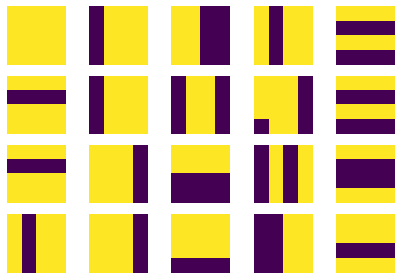

In [6]:
################################## Sampling ####################################
N = 1000
prob_v,_ = gibbs_sampler(torch.rand(N,DATA_SIZE),k=10)
img_samples = prob_v.view(N,*SHAPE).bernoulli()
# PLot some samples
fig,axs = plt.subplots(4,5)
for ax,img in zip(axs.flat,img_samples):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()
# Get and print score
p,r,score = train_dataset.score(img_samples)
print(f"qBAS : Precision = {p:.02} Recall = {r:.02} Score = {score:.02}")


In [7]:
############################## RECONSTRUCTION ##################################
k = 10
count = 0

mask = torch_transforms.functional.erase(torch.ones(1,*SHAPE),i=1,j=1,h=2,w=2,v=0).flatten()
for img, label in train_dataset:

    clamped = mask*img.flatten(1)
    prob_hk = rbm.forward(clamped + (1-mask)*0.5)
    prob_vk = rbm.generate(prob_hk).detach()
    for _ in range(k):
        masked = clamped + (1-mask)*prob_vk.data
        prob_hk.data = rbm.forward(masked).data
        prob_vk.data = rbm.generate(prob_hk).data
    recon = (clamped + (1-mask)*prob_vk).bernoulli().view(img.shape)

    if recon.equal(img):
        count+=1
print(f"Dataset Reconstruction: {count/len(train_dataset):.02}")


Dataset Reconstruction: 0.93


Text(0.5, 0, 'Epoch')

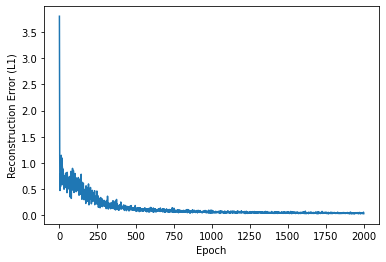

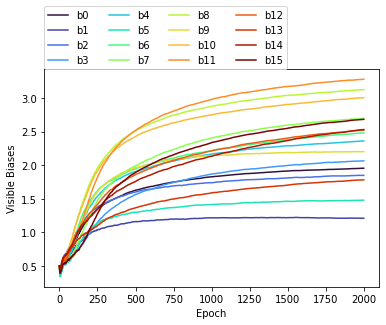

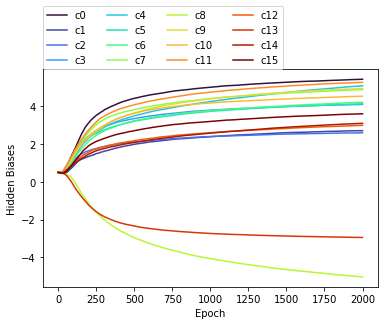

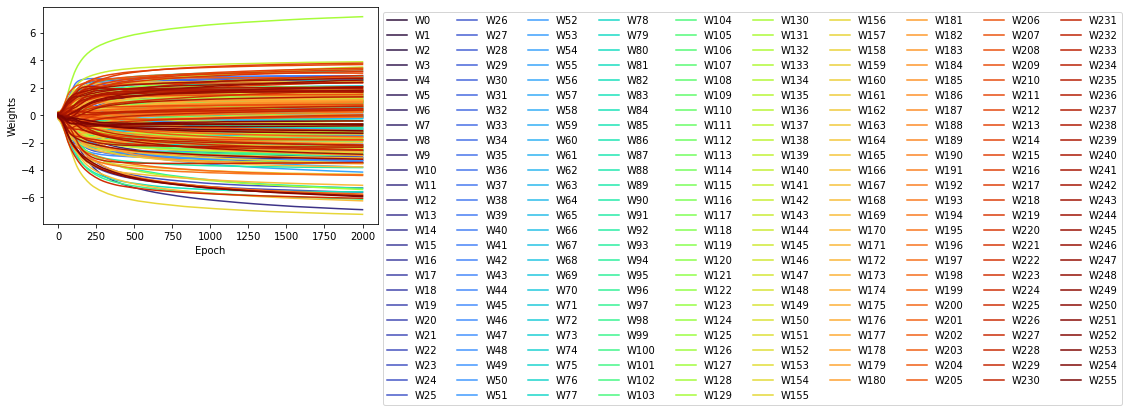

In [8]:
############################ MODEL VISUALIZATION ###############################

# L1 error graph
plt.plot(err_log)
plt.ylabel("Reconstruction Error (L1)")
plt.xlabel("Epoch")
plt.savefig("classical_err_log.pdf")

# Visible bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',DATA_SIZE).colors))
lc_v = ax.plot(b_log)
plt.legend(lc_v,[f'b{i}' for i in range(DATA_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Visible Biases")
plt.xlabel("Epoch")
plt.savefig("classival_b_log.pdf")

# Hidden bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',HIDDEN_SIZE).colors))
lc_h = plt.plot(c_log)
plt.legend(lc_h,[f'c{i}' for i in range(HIDDEN_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Hidden Biases")
plt.xlabel("Epoch")
plt.savefig("classical_c_log.pdf")

# Weights graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',rbm.V*rbm.H).colors))
lc_w = plt.plot(W_log)
labels = [f'W{i}' for i in range(rbm.V*rbm.H)]
plt.legend(lc_w,labels,ncol=10,bbox_to_anchor=(1,1))
plt.ylabel("Weights")
plt.xlabel("Epoch")


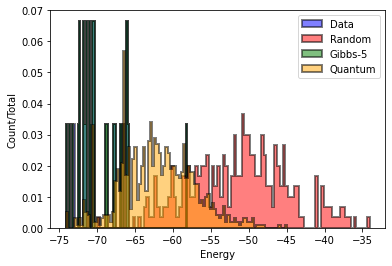

In [10]:
################################## ENERGY ######################################

data_energies = []
for img,label in train_dataset:
    data = img.flatten(1)
    data_energies.append(rbm.free_energy(data).item())

rand_energies = []
rand_data = torch.rand(len(train_dataset)*10,rbm.V)
for img in rand_data:
    rand_energies.append(rbm.free_energy(img.bernoulli()).item())

gibbs_energies = []
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
for img,label in train_dataset:
    data = img.flatten(1)
    prob_v,prob_h = gibbs_sampler(data,k=5)
    gibbs_energies.append(rbm.free_energy(prob_v.bernoulli()).item())


qa_energies = []
solver_name = "Advantage_system1.1"
qa_sampler = qaml.sampler.QuantumAnnealingNetworkSampler(rbm,solver=solver_name)
qa_sampleset = qa_sampler(num_reads=1000,auto_scale=True)
for s_v,s_h in zip(*qa_sampleset):
    qa_energies.append(rbm.free_energy(s_v.detach()).item())

plot_data = [(data_energies,  'Data',    'blue'),
             (rand_energies,  'Random',  'red'),
             (gibbs_energies, 'Gibbs-5', 'green'),
             (qa_energies,    'Quantum', 'orange')]

hist_kwargs = {'ec':'k','lw':2.0,'alpha':0.5,'histtype':'stepfilled','bins':100}
weights = lambda data: [1./len(data) for _ in data]

for data,name,color in plot_data:
    plt.hist(data,weights=weights(data),label=name,color=color,**hist_kwargs)

plt.xlabel("Energy")
plt.ylabel("Count/Total")
plt.legend(loc='upper right')
plt.savefig("classical_energies.pdf")


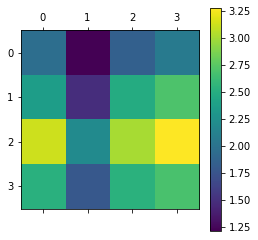

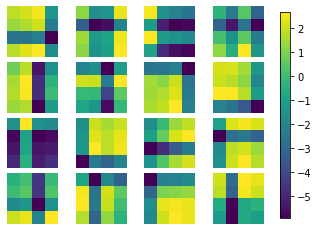

In [11]:
################################## VISUALIZE ###################################
plt.matshow(rbm.b.detach().view(*SHAPE), cmap='viridis')
plt.colorbar()
plt.savefig("classical_b.pdf")

fig,axs = plt.subplots(HIDDEN_SIZE//4,4)
for i,ax in enumerate(axs.flat):
    weight_matrix = rbm.W[i].detach().view(*SHAPE)
    ms = ax.matshow(weight_matrix, cmap='viridis')
    ax.axis('off')
fig.subplots_adjust(wspace=0.1, hspace=0.1)
cbar = fig.colorbar(ms, ax=axs.ravel().tolist(), shrink=0.95)
plt.savefig("classical_weights.pdf")